# ALD_U_N_1B

> Abstract: Access to level 1b product

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

viresclient: 0.7.2
pandas     : 1.2.4
xarray     : 0.17.0
matplotlib : 3.4.1



In [2]:
from viresclient import AeolusRequest
import datetime as dt
import matplotlib.pyplot as plt

request = AeolusRequest()

## Product information

Description of product.

Documentation:
- https://earth.esa.int/eogateway/catalog/aeolus-preliminary-hlos-horizontal-line-of-sight-wind-observations-for-rayleigh-and-mie-receivers


      Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (1.995MB)

      Downloading:  16%|█▋        |  [ Elapsed: 00:00, Remaining: 00:00 ] (1.995MB)

      Downloading:  36%|███▌      |  [ Elapsed: 00:00, Remaining: 00:00 ] (1.995MB)

      Downloading:  54%|█████▍    |  [ Elapsed: 00:00, Remaining: 00:00 ] (1.995MB)

      Downloading:  71%|███████▏  |  [ Elapsed: 00:00, Remaining: 00:00 ] (1.995MB)

      Downloading:  95%|█████████▌|  [ Elapsed: 00:00, Remaining: 00:00 ] (1.995MB)

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (1.995MB)

DATA: <xarray.Dataset>
Dimensions:                    (array_24: 24, array_25: 25, observation: 3370)
Dimensions without coordinates: array_24, array_25, observation
Data variables:
    time                       (observation) float64 ...
    rayleigh_altitude          (observation, array_25) float64 ...
    rayleigh_HLOS_wind_speed   (observation, array_24) float64 ...
    rayleigh_bin_quality_flag  (observation, array_24) uint16 ...


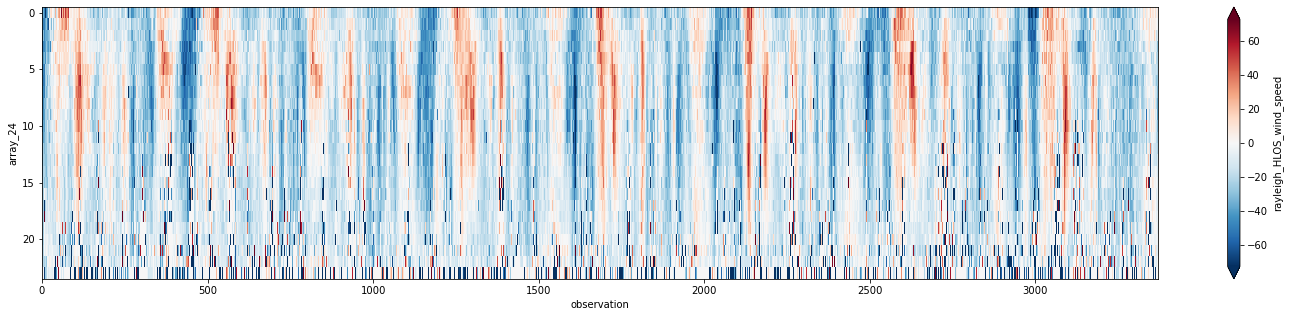

In [3]:

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (25,5)

request.set_collection('ALD_U_N_1B')

request.set_fields(observation_fields=[
    "time",
    "rayleigh_altitude",
    "rayleigh_HLOS_wind_speed",
    "rayleigh_bin_quality_flag"
])

data = request.get_between(
    start_time="2020-06-22T00:00:00Z",
    end_time="2020-06-22T12:00:00Z",
    filetype="nc",
    asynchronous=False
)

ds = data.as_xarray()

rayleigh_data = ds['rayleigh_HLOS_wind_speed'].values

ds["rayleigh_HLOS_wind_speed"].plot.pcolormesh(
    x="observation",
    yincrease=False,
    robust=True
)
